In [2]:
import numpy as np
import scipy.integrate as integrate
import scipy.special as special
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
import cmath

In [17]:
A=1-5j
B=2j
kappa=1
1+B/2

(1+1j)

In [18]:
def Cauchy(z):
    s=integrate.quad(lambda x: (x-z.real)*np.exp(-x**2)/((x-z.real)**2+z.imag**2), -np.inf, np.inf)[0]
    s=s+1j*z.imag*integrate.quad(lambda x: np.exp(-x**2)/((x-z.real)**2+z.imag**2), -np.inf, np.inf)[0]
    return s/np.sqrt(np.pi)
I = np.vectorize(Cauchy)


def lambda_z(A, B, kappa, z):
    return (A**2+kappa**2*z**2-B*z**4-B*z**5*I(z))/(A**2+kappa**2*z**2)

def lambda_z_wave(A, B, kappa, z):
    return (A**2+kappa**2*z**2-B*z**4-B*z**5*I(z))

def lambda_plus(A, B, kappa, z):
    y=1-B*z**4/((A**2+kappa**2*z**2))-B*z**5*(-2*special.dawsn(z))/((A**2+kappa**2*z**2))-np.pi*1j*B*z**5*np.exp(-z**2)/(np.sqrt(np.pi)*(A**2+kappa**2*z**2))
    return y#*(A**2+kappa**2*z**2)/(z+1j)**2
lambda_plus = np.vectorize(lambda_plus)

def lambda_0(A, B, kappa, z):
    y=1-B*z**4/((A**2+kappa**2*z**2))-B*z**5*(-2*special.dawsn(z))/((A**2+kappa**2*z**2))#-np.pi*1j*B*z**5*np.exp(-z**2)/(np.sqrt(np.pi)*(A**2+kappa**2*z**2))
    return y#*(A**2+kappa**2*z**2)
lambda_plus = np.vectorize(lambda_plus)

def lambda_plus_wave(A, B, kappa, z):
    y=1-B*z**4/((A**2+kappa**2*z**2))-B*z**5*(-2*special.dawsn(z))/((A**2+kappa**2*z**2))-np.pi*1j*B*z**5*np.exp(-z**2)/(np.sqrt(np.pi)*(A**2+kappa**2*z**2))
    return y*(A**2+kappa**2*z**2)
lambda_plus_wave = np.vectorize(lambda_plus_wave)



#Для поиска корней:

def M_plus(A, B, kappa, t):
    return (A**2+kappa**2*t**2-B*t**4-B*t**5*(-2*special.dawsn(t))-np.sqrt(np.pi)*1j*B*t**5*np.exp(-t**2))/(kappa*t+A*1j)**2

def M_minus(A, B, kappa, t):
    return (A**2+kappa**2*t**2-B*t**4-B*t**5*(-2*special.dawsn(t))+np.sqrt(np.pi)*1j*B*t**5*np.exp(-t**2))/(kappa*t-A*1j)**2

def M(A, B, kappa, t):
    return (A**2+kappa**2*t**2-B*t**4-B*t**5*I(t))/(kappa*t+A*1j)**2


def Cauchy2(z):
    s=integrate.quad(lambda x: (x**2+z.real**2-z.imag**2-2*x*z.real)*np.exp(-x**2)/((x-z.real)**2+z.imag**2)**2, -np.inf, np.inf)[0]
    s=s+2j*z.imag*integrate.quad(lambda x: (x-z.real)*np.exp(-x**2)/((x-z.real)**2+z.imag**2)**2, -np.inf, np.inf)[0]
    return s/np.sqrt(np.pi)
J=np.vectorize(Cauchy2)

def dlambda_dz(A, B, kappa, z):
    return -((4*B*z**3+5*B*z**4*I(z)+B*z**5*J(z))*(A**2+kappa**2*z**2)+(lambda_z(A, B, kappa, z)-1)*(2*z*kappa**2))/(A**2+kappa**2*z**2)**2

def root_Newton(A, B, kappa, z):
   eps=1e-10
   x2=0
   x1=z
   while abs(x1-x2)>eps:
      s=x1-lambda_z(A, B, kappa, x1)/dlambda_dz(A, B, kappa, x1)
      x2=x1
      x1=s
   return x1
root_Newton=np.vectorize(root_Newton)


$$\Omega(z)$$

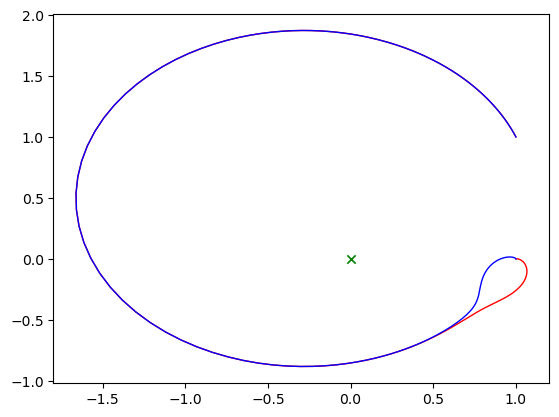

In [19]:
plt.scatter(0, 0,color='g',lw=1.2, marker="x")
z=np.linspace(-150,0, 3000)
y=lambda_plus(A, B, kappa, z)
plt.plot(y.real,y.imag,color='red',lw=1)

z=np.linspace(0,150, 3000)
y=lambda_plus(A, B, kappa, z)
plt.plot(y.real,y.imag,color='b',lw=1)

plt.show()


$$\widetilde{\Omega}(z)
$$ 

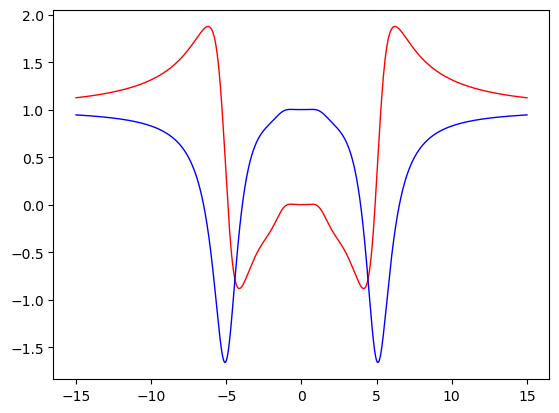

In [20]:
z=np.linspace(-15,15, 5000)
y=lambda_0(A, B, kappa, z)
plt.plot(z,y.imag,color='red',lw=1)
plt.plot(z.real,y.real,color='b',lw=1)

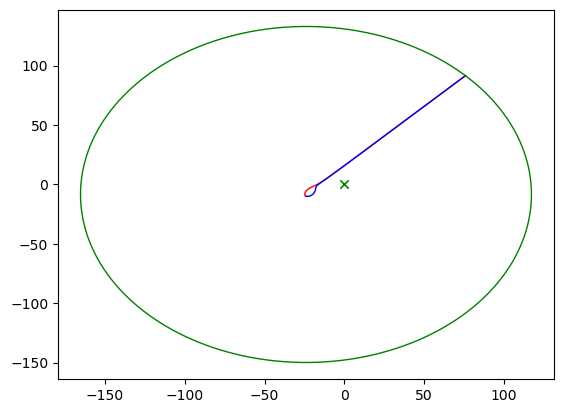

In [21]:
r=10
plt.scatter(0, 0,color='g',lw=1.2, marker="x")
z=np.linspace(-r,0, 5000)
y=lambda_plus_wave(A, B, kappa, z)
plt.plot(y.real,y.imag,color='red',lw=1)

z=np.linspace(0,r, 5000)
y=lambda_plus_wave(A, B, kappa, z)
plt.plot(y.real,y.imag,color='b',lw=1)

x=np.linspace(-r,r, 5000)
y=np.sqrt(r**2-x**2)
z=x+1j*y+0.000001j
plt.plot(lambda_z_wave(A, B, kappa, z).real, lambda_z_wave(A, B, kappa, z).imag, color='g', lw=1)

plt.show()

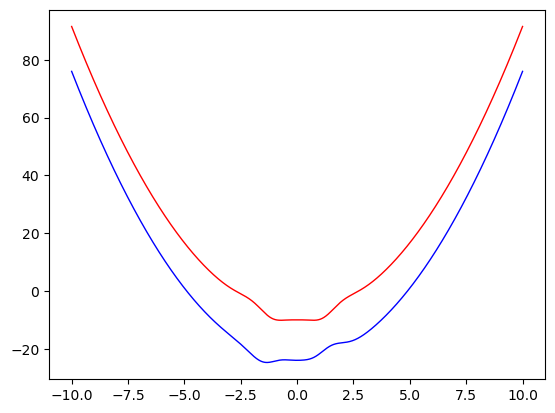

In [25]:
z=np.linspace(-r,r, 5000)
y=lambda_plus_wave(A, B, kappa, z)
plt.plot(z,y.real,color='b',lw=1)
plt.plot(z,y.imag,color='red',lw=1)
plt.savefig('Графики/12.eps', format='eps', )

Нахождение корней

In [9]:
def y(A, B, kappa, t):
     if np.pi/3+0.07<=t<=3*np.pi/2-0.04:
        f=cmath.log((((t+1j)/(t-1j))**2)*M_plus(A, B, kappa, t)/M_minus(A, B, kappa, t))-2*np.pi*1j
     elif -np.pi/3-0.07>=t>=-3*np.pi/2+0.04:
        f=cmath.log((((t+1j)/(t-1j))**2)*M_plus(A, B, kappa, t)/M_minus(A, B, kappa, t))+2*np.pi*1j
     else:
        f=cmath.log((((t+1j)/(t-1j))**2)*M_plus(A, B, kappa, t)/M_minus(A, B, kappa, t))
     return f #cmath.log((((t+1j)/(t-1j))**2)*M_plus(A, B, kappa, t)/M_minus(A, B, kappa, t))
y=np.vectorize(y)
def Gamma(A, B, kappa, t):
    s=1j*integrate.quad(lambda x: (x-t.real)*y(A, B, kappa, x).imag/((x-t.real)**2+t.imag**2), -np.inf, np.inf)[0]
    s=s-t.imag*integrate.quad(lambda x: y(A, B, kappa, x).imag/((x-t.real)**2+t.imag**2), -np.inf, np.inf)[0]
    s=s+integrate.quad(lambda x: (x-t.real)*y(A, B, kappa, x).real/((x-t.real)**2+t.imag**2), -np.inf, np.inf)[0]
    s=s+1j*t.imag*integrate.quad(lambda x: y(A, B, kappa, x).real/((x-t.real)**2+t.imag**2), -np.inf, np.inf)[0]
    return s/(2*np.pi*1j)
gamma=np.vectorize(Gamma)

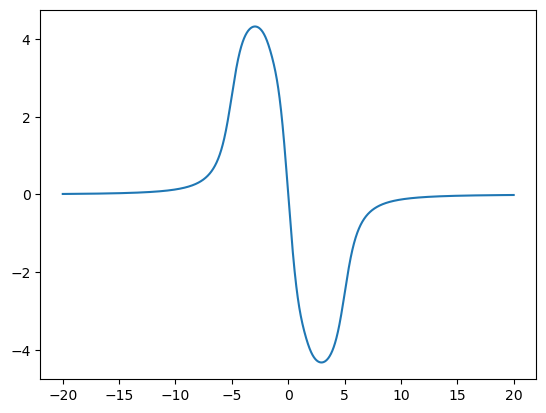

In [10]:
x=np.linspace(-20, 20,  3000)
plt.plot(x,y(A, B, kappa, x).imag)

In [11]:
def root(A, B, kappa, z):
    M_inf=1+B/(2*kappa**2)
    return cmath.sqrt(z**2-(M(A, B, kappa, z)*(z+1j)**2)/(cmath.exp(gamma(A, B, kappa, z))*M_inf))
root=np.vectorize(root)

In [12]:
r=root(A, B, kappa, 12j-10)
print(-r, r)

(-4.138732757646309+0.9573000985337201j) (4.138732757646309-0.9573000985337201j)


In [13]:
print(lambda_z(A, B, kappa, -r), lambda_z(A, B, kappa, r))

(9.227317006081898e-12-7.566520734940475e-12j) (9.227317006081898e-12-7.566520734940475e-12j)


$$\lim_{x \to \infty}  $$